In [ ]:
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import random
import time
import datetime

In [ ]:
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (255, 255))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [ ]:
def load_data_multi_class(dataset_path):
    data = []
    labels = []

    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):

            label = folder.lower()  # Utilisez le nom du dossier comme label
            print(label)
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (255, 255))
                data.append(img)
                labels.append(label)

    data = np.array(data) / 255.0
    labels = np.array(labels)

    return data, labels

# Load model

In [ ]:
from keras.models import load_model
#model.save('models/88-83.h5')

model = load_model('models/88-83.h5')
#model.summary()

## fonctions

In [ ]:
def predict_defect_multi_class(model, image_path):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    #print (model.predict(preprocessed_img))

    # Interprétez les prédictions
    class_labels = [ 'OK','bed_not_stick', 'spaghetti']
    predicted_class = class_labels[np.argmax(predictions)]

    return predicted_class

In [ ]:
def predict(dir):
    resultf=""
    nb_total=0
    nb_positif=0
    for filename in os.listdir(dir):
        #print(filename)
        nb_total+=1

        result = predict_defect_multi_class(model, dir +"/" + filename)
        if result.upper()==dir[4:].upper():
            nb_positif+=1

        resultf= resultf + "prédiction pour"+ filename + " : "+ str(result) +"\n"

    print (resultf)
    print(str((nb_positif*100)/nb_total) + " % de précision")


In [ ]:
def vignette_random(dir):
  L=[]
  for filename in os.listdir(dir):
    L.append(filename)
  file_alea = L[random.randint(0, (len(L)-1))]
  image_path = dir +"/" + file_alea
  result = predict_defect_multi_class(model, image_path)
  img = Image.open(image_path)
  plt.imshow(img)
  plt.axis('off')  # Masquer les axes
  plt.show()

  print (result)

# Predict from a webcam

On prend une photo avec une webcam USB et on process la capture pour faire de la détéction de défaut avec notre modèle

## Fonctions

In [ ]:
def capture():
  cap = cv2.VideoCapture(1)

  if not cap.isOpened():
      print("Erreur: Impossible d'ouvrir la webcam.")
      exit()

  time.sleep(0.5)
  ret, frame = cap.read()

  if ret:
      cv2.imwrite("photo_capturee.jpg", frame)
      print("Photo capturée avec succès.")

      result = predict_defect_multi_class(model, 'photo_capturee.jpg')
      img = Image.open('photo_capturee.jpg')
      plt.imshow(img)
      plt.axis('off')
      now = datetime.datetime.now().strftime("%H:%M:%S")

      plt.show()
      print(f"Prédiction pour la capture caméra : {result}")
      print(f"à {now}")

  else:
      print("Erreur lors de la capture de la photo.")
  cap.release()

In [ ]:
def capture_boucle():
    try:
        while True:
            capture()
            print()
            #wait
            time.sleep(0.5)

    except KeyboardInterrupt:
        print("\nInterruption de l'utilisateur. Fin du script.")

Photo capturée avec succès.
1/1 [==============================] - 0s 98ms/step


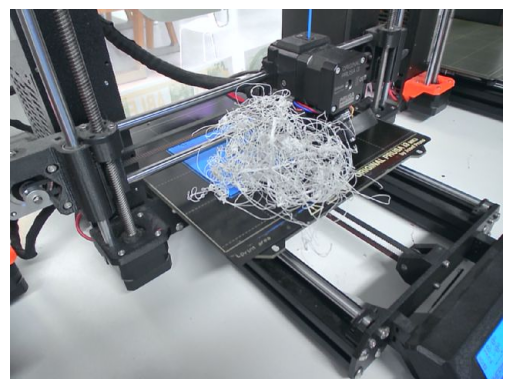

Prédiction pour la capture caméra : spaghetti
à 16:58:56


In [ ]:
capture()

Photo capturée avec succès.
1/1 [==============================] - 0s 85ms/step


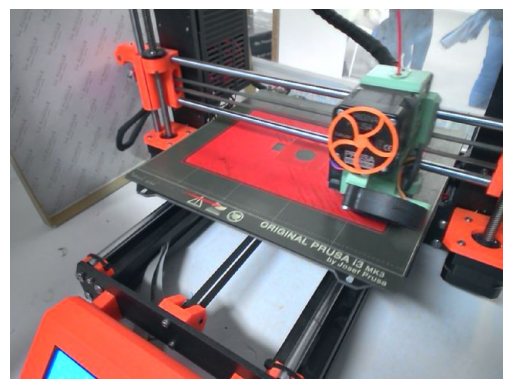

Prédiction pour la capture caméra : OK
à 16:57:55

Photo capturée avec succès.
1/1 [==============================] - 0s 103ms/step


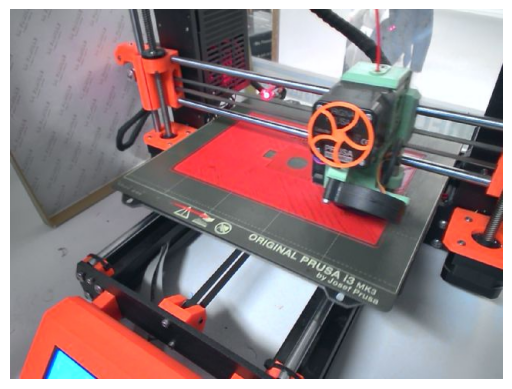

Prédiction pour la capture caméra : OK
à 16:58:02

Photo capturée avec succès.
1/1 [==============================] - 0s 96ms/step


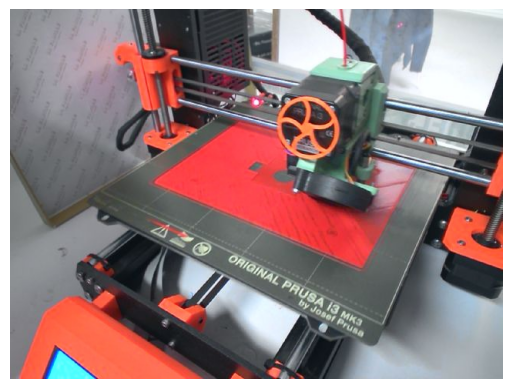

Prédiction pour la capture caméra : OK
à 16:58:09

Photo capturée avec succès.
1/1 [==============================] - 0s 129ms/step


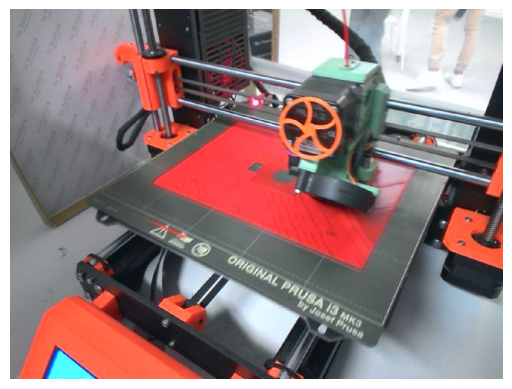

Prédiction pour la capture caméra : OK
à 16:58:15

Photo capturée avec succès.
1/1 [==============================] - 0s 99ms/step


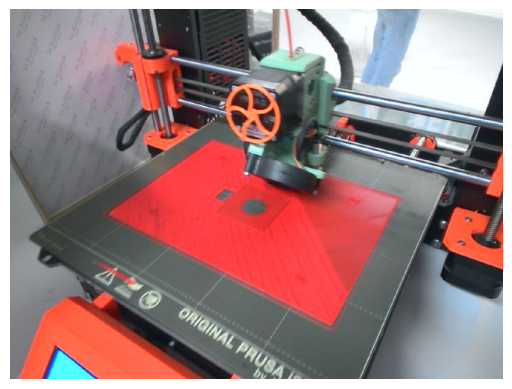

Prédiction pour la capture caméra : OK
à 16:58:22


Interruption de l'utilisateur. Fin du script.


In [ ]:
capture_boucle()